In [1]:
cd I:\Data\Used\ERA5\ERA5 Skin temperature, Soil temperature level 1, Surface pressure, Total precipitation 2010_2022 Osmanabad

I:\Data\Used\ERA5\ERA5 Skin temperature, Soil temperature level 1, Surface pressure, Total precipitation 2010_2022 Osmanabad


In [2]:
import numpy as np
import pandas as pf
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as xrr
import xarray as xr
from shapely.geometry import mapping

In [3]:
e2010_12 = xr.load_dataset('ERA5_hourly_data_on_single_levels_from_1979_to_present_Skin_temp_Soil_temp_level1_Surface_pressure_Total prec2010_2011_2012.nc',engine = 'netcdf4')

In [4]:
e2010_12#.close()

<xarray.Dataset>
Dimensions:    (longitude: 25, latitude: 17, time: 26304)
Coordinates:
  * longitude  (longitude) float32 73.0 73.25 73.5 73.75 ... 78.5 78.75 79.0
  * latitude   (latitude) float32 20.0 19.75 19.5 19.25 ... 16.5 16.25 16.0
  * time       (time) datetime64[ns] 2010-01-01 ... 2012-12-31T23:00:00
Data variables:
    skt        (time, latitude, longitude) float32 291.4 290.8 ... 293.4 294.0
    stl1       (time, latitude, longitude) float32 293.3 292.2 ... 295.2 296.0
    sp         (time, latitude, longitude) float32 9.971e+04 ... 9.591e+04
    tp         (time, latitude, longitude) float32 0.0 0.0 0.0 ... 5.644e-07 0.0
Attributes:
    Conventions:  CF-1.6
    history:      2022-05-24 14:12:32 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [5]:
e2010_12_daily= e2010_12.resample(time='D').mean()

In [6]:
e2010_12_daily

<xarray.Dataset>
Dimensions:    (time: 1096, longitude: 25, latitude: 17)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2012-12-31
  * longitude  (longitude) float32 73.0 73.25 73.5 73.75 ... 78.5 78.75 79.0
  * latitude   (latitude) float32 20.0 19.75 19.5 19.25 ... 16.5 16.25 16.0
Data variables:
    skt        (time, latitude, longitude) float32 298.5 297.8 ... 296.6 297.3
    stl1       (time, latitude, longitude) float32 298.1 297.0 ... 297.3 298.3
    sp         (time, latitude, longitude) float32 9.98e+04 ... 9.595e+04
    tp         (time, latitude, longitude) float32 0.0 0.0 ... 5.478e-05

In [ ]:
Dharashiv = Dharashiv1[Dharashiv1['distname'] == 'Osmanabad']

In [ ]:
Dharashiv

In [ ]:
# Dharashiv.to_file('Dharashiv.shp')  

In [7]:
MSWEP_monthly2 = e2010_12_daily.skt
MSWEP_monthly2.rio.set_spatial_dims(x_dim="longitude", y_dim="latitude", inplace=True)
MSWEP_monthly2.rio.write_crs("epsg:4326", inplace=True)
Africa_Shape = gpd.read_file('Dharashiv.shp', crs="epsg:4326")

clipped = MSWEP_monthly2.rio.clip(Africa_Shape.geometry.apply(mapping), Africa_Shape.crs, drop=False)

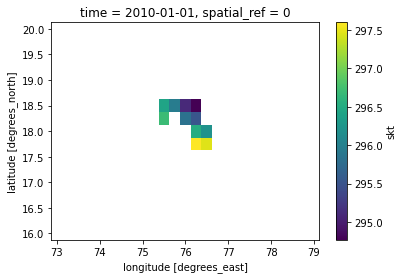

In [8]:
clipped[0].plot()

In [69]:
clipped.shape

(1096, 17, 25)

In [9]:

#from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import matplotlib.patheffects as path_effects
import sys as s
import cartopy.feature as cfeature
import os 
import cartopy as cartopy
from cartopy import config
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

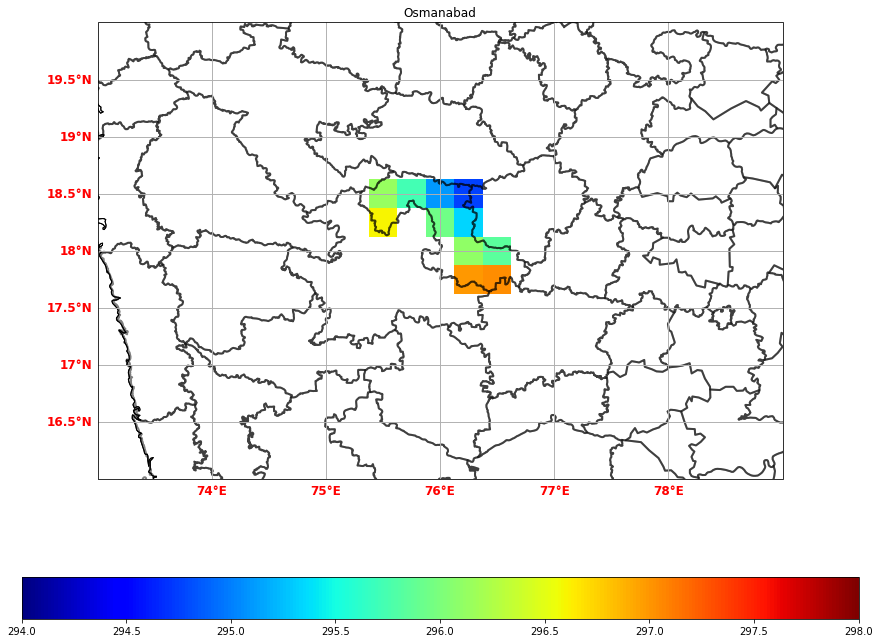

In [10]:
fname= r'I:\Data\Unused\Indian_shape_files\output.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())

def main():
    plt.figure(figsize=(15,12),facecolor = 'none')
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([clipped.longitude.min(),clipped.longitude.max(),clipped.latitude.min(),clipped.latitude.max()], crs=ccrs.PlateCarree()) # [lonmin,lonmax,latmin,latmax]
    ax.coastlines()
    ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.5,lw = 2, facecolor='none') #
#     ax.add_feature(cfeature.LAND, edgecolor='black')
#     ax.add_feature(cfeature.BORDERS)
#     ax.add_feature(cfeature.STATES.with_scale('10m'),
#                linestyle='-', alpha=.25, facecolor='none', edgecolor='black')
    
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines()
    filled_c = ax.pcolormesh(clipped.longitude,clipped.latitude,clipped[1,:,:],cmap = 'jet',vmin = 294 , vmax = 298,
                           transform=ccrs.PlateCarree())
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 12,'color': 'red', 'weight': 'bold'}
        # Add a colorbar for the filled contour.
    plt.colorbar(filled_c,ax=ax, orientation='horizontal')
    plt.title('Osmanabad')
    plt.show()


if __name__ == '__main__':
    main()

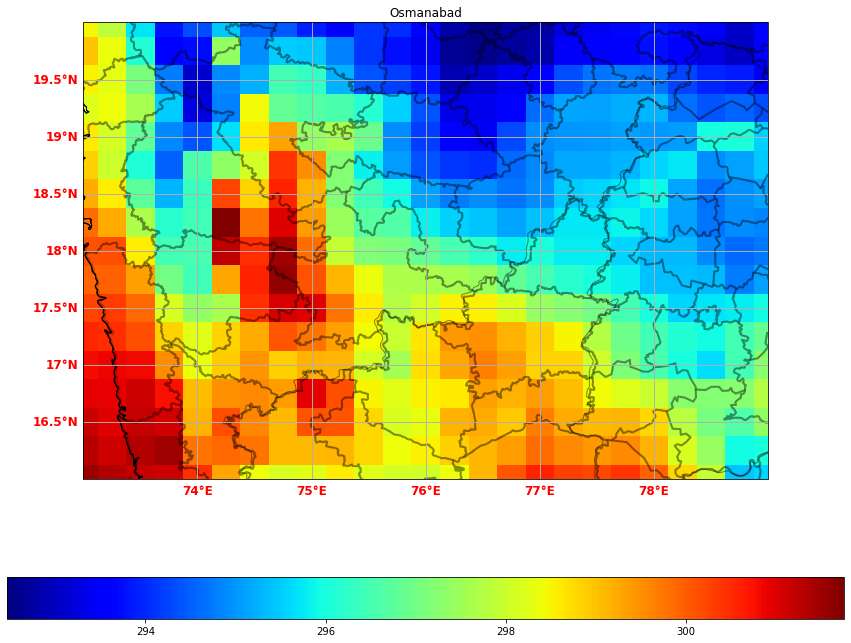

In [11]:
fname= r'I:\Data\Unused\Indian_shape_files\output.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())

def main():
    plt.figure(figsize=(15,12))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([clipped.longitude.min(),clipped.longitude.max(),clipped.latitude.min(),clipped.latitude.max()], crs=ccrs.PlateCarree()) # [lonmin,lonmax,latmin,latmax]
    ax.coastlines()
    ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.25,lw = 2, facecolor='none') #
    ax.add_feature(cfeature.LAND, edgecolor='black')
#     ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES.with_scale('10m'),
               linestyle='-', alpha=.25, facecolor='none', edgecolor='black')
    
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines()
    filled_c = ax.pcolormesh(clipped.longitude,clipped.latitude,e2010_12_daily.skt[0,:,:],cmap = 'jet')#,vmin = 294 , vmax = 298)#,60,
#                            transform=ccrs.PlateCarree(),cmap = 'jet')
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 12,'color': 'red', 'weight': 'bold'}
        # Add a colorbar for the filled contour.
    plt.colorbar(filled_c,ax=ax, orientation='horizontal')
    plt.title('Osmanabad')
    plt.show()


if __name__ == '__main__':
    main()